In [10]:
import pandas as pd

df = pd.read_csv('data/preprocessed_data_full_encoded_new_v2.csv')

print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())

display(df.head(10))

Total pasien: 53017
Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0): 26651
Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1): 26366


,age,height,weight,systolic,diastolic,bmi,bmi_category,map,map_category,age_category,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio
0,50,168,62.0,110,80,21.97,1,90.00,1,2,30,0,0,1,0,0,1,0
1,55,156,85.0,140,90,34.93,3,106.67,3,2,50,2,0,0,0,0,1,1
2,51,165,64.0,130,70,23.51,1,90.00,1,2,60,2,0,0,0,0,0,1
3,48,169,82.0,150,100,28.71,2,116.67,3,2,50,0,0,1,0,0,1,1
4,60,151,67.0,120,80,29.38,2,93.33,2,3,40,1,1,0,0,0,0,0
5,61,178,95.0,130,90,29.98,2,103.33,3,3,40,2,2,1,0,0,1,1
6,48,158,71.0,110,70,28.44,2,83.33,0,2,40,0,0,0,0,0,1,0
7,61,169,80.0,120,80,28.01,2,93.33,2,3,40,0,0,0,0,0,1,0
8,51,173,60.0,120,80,20.05,1,93.33,2,2,40,0,0,1,0,0,1,0
9,40,165,60.0,120,80,22.04,1,93.33,2,2,40,0,0,1,0,0,0,0


In [31]:
def get_mask(df, cond):
    mask = pd.Series(True, index=df.index)
    for key, value in cond.items():
        mask &= (df[key] == value)
    return mask


print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())

# List kondisi yang dicari
conditions_1 = [
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},

    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0}
]


filtered_dfs_1 = [
    df[get_mask(df, cond) & (df['cardio'] == 1)]
    for cond in conditions_1
]

total_count_1 = sum(len(filt_df) for filt_df in filtered_dfs_1)

print("Total count:", total_count_1)
 
combined_filtered_1 = pd.concat(filtered_dfs_1)

indices_to_remove_1 = combined_filtered_1.index.unique()

df.drop(indices_to_remove_1, inplace=True)


print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())

# List kondisi yang dicari
conditions_2 = [
    
    # indikasi cardio tapi label = 0
    #####
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
     
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #-------------------------------------------------------------------------------------------------------------------------#
    #####
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #-------------------------------------------------------------------------------------------------------------------------#
    #####
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    ##### 
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #-------------------------------------------------------------------------------------------------------------------------#
     #####
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #-------------------------------------------------------------------------------------------------------------------------#
    #-------------------------------------------------------------------------------------------------------------------------#
    #####
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},

    #####
    {'age_category': 0, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #-------------------------------------------------------------------------------------------------------------------------#
    #####
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},

    #####
    {'age_category': 0, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    ######
    {'age_category': 0, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #-------------------------------------------------------------------------------------------------------------------------#
    #####
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},

    #####
    {'age_category': 0, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #-------------------------------------------------------------------------------------------------------------------------#
        #####
    {'age_category': 0, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 0, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},

    #####
    {'age_category': 0, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 1, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 0, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1}
    
]

filtered_dfs_2 = [
    df[get_mask(df, cond) & (df['cardio'] == 0)]
    for cond in conditions_2
]

total_count_2 = sum(len(filt_df) for filt_df in filtered_dfs_2)

print("Total count:", total_count_2)

combined_filtered_2 = pd.concat(filtered_dfs_2)

indices_to_remove_2 = combined_filtered_2.index.unique()

df.drop(indices_to_remove_2, inplace=True)

print("DataFrame setelah penghapusan:")
print(df)

print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())



Total pasien: 57957
Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0): 31591
Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1): 26366
Total count: 0
Total pasien: 57957
Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0): 31591
Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1): 26366
Total count: 0
DataFrame setelah penghapusan:
       age  height  weight  systolic  diastolic    bmi  bmi_category     map  \
0       50     168    62.0       110         80  21.97             1   90.00   
1       55     156    85.0       140         90  34.93             3  106.67   
2       51     165    64.0       130         70  23.51             1   90.00   
3       48     169    82.0       150        100  28.71             2  116.67   
4       60     151    67.0       120         80  29.38             2   93.33   
...    ...     ...     ...       ...        ...    ...           ...     ...   
57952   51     161    56.0       170         90

In [ ]:
#df.to_csv('data/preprocessed_data_full_encoded_new.csv', index=False)

In [18]:
import pandas as pd

df = pd.read_csv('data/preprocessed_data_full_encoded_new_v2.csv')

def get_mask(df, cond):
    mask = pd.Series(True, index=df.index)
    for key, value in cond.items():
        mask &= (df[key] == value)
    return mask


print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())

# List kondisi yang dicari
conditions_1 = [
    # Kombinasi A
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    
    # Kombinasi B
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    
    # Kombinasi C
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    # Kombinasi D
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    # Kombinasi A
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 0},
    
    # Kombinasi B
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 1, 'active': 1},
    
    # Kombinasi C
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    # Kombinasi D
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 5, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},

    # Kombinasi E
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    # Kombinasi F
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 4, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},

    # Kombinasi G
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    # Kombinasi H
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 3, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},

    # Kombinasi I
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},

    # Kombinasi J
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    # Kombinasi K
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 0},
    
    ###
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 0},
    
    # Kombinasi L
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 1, 'alco': 0, 'active': 1},
    
    ###
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 1, 'active': 1},
    
]

filtered_dfs_1 = [
    df[get_mask(df, cond) & (df['cardio'] == 0)]
    for cond in conditions_1
]

total_count_1 = sum(len(filt_df) for filt_df in filtered_dfs_1)

print("Total count (miss label):", total_count_1)

combined_filtered_1 = pd.concat(filtered_dfs_1)

display(combined_filtered_1)

# indices_to_remove = combined_filtered_1.index.unique()

# df.drop(indices_to_remove, inplace=True)

# print("DataFrame setelah penghapusan:")
# print(df)

# print("Total pasien:", len(df))
# print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
# print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())


Total pasien: 53017
Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0): 26651
Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1): 26366
Total count (miss label): 0


,age,height,weight,systolic,diastolic,bmi,bmi_category,map,map_category,age_category,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio


In [31]:
import pandas as pd

df = pd.read_csv('data/preprocessed_data_full_encoded_new_v2.csv')

def get_mask(df, cond):
    mask = pd.Series(True, index=df.index)
    for key, value in cond.items():
        mask &= (df[key] == value)
    return mask


print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())

# List kondisi yang dicari
conditions_1 = [
    # Kombinasi A
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},

    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},

    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    # Kombinasi B
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},

    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},

    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
]

filtered_dfs_1 = [
    df[get_mask(df, cond) & (df['cardio'] == 0)]
    for cond in conditions_1
]

total_count_1 = sum(len(filt_df) for filt_df in filtered_dfs_1)

print("Total count (miss label):", total_count_1)

combined_filtered_1 = pd.concat(filtered_dfs_1)

display(combined_filtered_1)

# indices_to_remove = combined_filtered_1.index.unique()

# df.drop(indices_to_remove, inplace=True)

# print("DataFrame setelah penghapusan:")
# print(df)

# print("Total pasien:", len(df))
# print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
# print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())


Total pasien: 53017
Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0): 26651
Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1): 26366
Total count (miss label): 1651


,age,height,weight,systolic,diastolic,bmi,bmi_category,map,map_category,age_category,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio
24832,39,161,54.0,130,80,20.83,1,96.67,3,1,50,0,0,0,0,0,0,0
30301,39,168,66.0,140,90,23.38,1,106.67,3,1,50,0,0,0,0,0,0,0
36534,39,160,53.0,126,82,20.70,1,96.67,3,1,44,0,0,0,0,0,0,0
45033,39,177,62.0,130,80,19.79,1,96.67,3,1,50,0,0,0,0,0,0,0
49911,39,175,75.0,120,90,24.49,1,100.00,3,1,30,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,44,160,60.0,160,90,23.44,1,113.33,3,2,70,1,2,0,0,0,1,0
32206,56,175,68.0,130,90,22.20,1,103.33,3,2,40,1,2,1,0,0,1,0
38225,63,186,80.0,130,90,23.12,1,103.33,3,3,40,1,2,1,0,0,1,0
51203,63,169,71.0,140,90,24.86,1,106.67,3,3,50,1,2,0,0,0,1,0


In [ ]:
import pandas as pd

df = pd.read_csv('data/preprocessed_data_full_encoded_new_v2.csv')

def get_mask(df, cond):
    mask = pd.Series(True, index=df.index)
    for key, value in cond.items():
        mask &= (df[key] == value)
    return mask


print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())

# List kondisi yang dicari
conditions_1 = [
    # Kombinasi A
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},  
]

filtered_dfs_1 = [
    df[get_mask(df, cond) & (df['cardio'] == 1)]
    for cond in conditions_1
]

total_count_1 = sum(len(filt_df) for filt_df in filtered_dfs_1)

print("Total count (miss label):", total_count_1)

combined_filtered_1 = pd.concat(filtered_dfs_1)

display(combined_filtered_1)

# indices_to_remove = combined_filtered_1.index.unique()

# df.drop(indices_to_remove, inplace=True)

# print("DataFrame setelah penghapusan:")
# print(df)

# print("Total pasien:", len(df))
# print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
# print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())


Total pasien: 53017
Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0): 26651
Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1): 26366
Total count (miss label): 1600


,age,height,weight,systolic,diastolic,bmi,bmi_category,map,map_category,age_category,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio
4059,39,167,73.0,120,80,26.18,2,93.33,2,1,40,0,0,1,0,0,1,1
5659,39,170,82.0,120,80,28.37,2,93.33,2,1,40,0,0,1,0,0,1,1
5738,39,153,61.0,120,80,26.06,2,93.33,2,1,40,0,0,0,0,0,1,1
6552,39,158,64.0,120,80,25.64,2,93.33,2,1,40,0,0,0,0,0,1,1
13461,39,160,65.0,120,80,25.39,2,93.33,2,1,40,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52478,64,160,65.0,120,80,25.39,2,93.33,2,3,40,0,0,0,0,0,1,1
52495,63,163,70.0,120,80,26.35,2,93.33,2,3,40,0,0,1,0,0,1,1
52630,64,170,75.0,120,80,25.95,2,93.33,2,3,40,0,0,1,0,0,1,1
52771,61,162,70.0,120,80,26.67,2,93.33,2,3,40,0,0,0,0,0,1,1


In [32]:
import pandas as pd

df = pd.read_csv('data/preprocessed_data_full_encoded_new_v2.csv')

def get_mask(df, cond):
    mask = pd.Series(True, index=df.index)
    for key, value in cond.items():
        mask &= (df[key] == value)
    return mask


print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())

# List kondisi yang dicari
conditions_1 = [
    # Kombinasi A
    {'age_category': 0, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 2, 'bmi_category': 2, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},  
]


filtered_dfs_1 = [
    df[get_mask(df, cond) & (df['cardio'] == 1)]
    for cond in conditions_1
]

total_count_1 = sum(len(filt_df) for filt_df in filtered_dfs_1)

print("Total count:", total_count_1)
 
combined_filtered_1 = pd.concat(filtered_dfs_1)

indices_to_remove_1 = combined_filtered_1.index.unique()

df.drop(indices_to_remove_1, inplace=True)


print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())

# List kondisi yang dicari
conditions_2 = [
    # Kombinasi A
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 0},

    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 0},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 0},

    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 0},
    
    # Kombinasi B
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 0, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 0, 'alco': 1, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 2, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 0, 'active': 1},

    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 1, 'smoke': 1, 'alco': 1, 'active': 1},
    
    #####
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 1},
    
    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 0, 'alco': 1, 'active': 1},

    {'age_category': 0, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 1, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 2, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1},
    {'age_category': 3, 'map_category': 3, 'bmi_category': 1, 'cholesterol': 1, 'gluc': 2, 'smoke': 1, 'alco': 1, 'active': 1}
    
]

filtered_dfs_2 = [
    df[get_mask(df, cond) & (df['cardio'] == 0)]
    for cond in conditions_2
]

total_count_2 = sum(len(filt_df) for filt_df in filtered_dfs_2)

print("Total count:", total_count_2)

combined_filtered_2 = pd.concat(filtered_dfs_2)

indices_to_remove_2 = combined_filtered_2.index.unique()

df.drop(indices_to_remove_2, inplace=True)

print("DataFrame setelah penghapusan:")
print(df)

print("Total pasien:", len(df))
print("Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0):", (df['cardio'] == 0).sum())
print("Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1):", (df['cardio'] == 1).sum())



Total pasien: 53017
Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0): 26651
Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1): 26366
Total count: 1600
Total pasien: 51417
Pasien dengan tidak terindikasi penyakit kardiovaskular (cardio = 0): 26651
Pasien dengan terindikasi penyakit kardiovaskular (cardio = 1): 24766
Total count: 1651
DataFrame setelah penghapusan:
       age  height  weight  systolic  diastolic    bmi  bmi_category     map  \
0       50     168    62.0       110         80  21.97             1   90.00   
1       55     156    85.0       140         90  34.93             3  106.67   
2       51     165    64.0       130         70  23.51             1   90.00   
3       48     169    82.0       150        100  28.71             2  116.67   
4       60     151    67.0       120         80  29.38             2   93.33   
...    ...     ...     ...       ...        ...    ...           ...     ...   
53012   56     159    72.0       130     

In [33]:
df.to_csv('data/preprocessed_data_full_encoded_new_v3.csv', index=False)

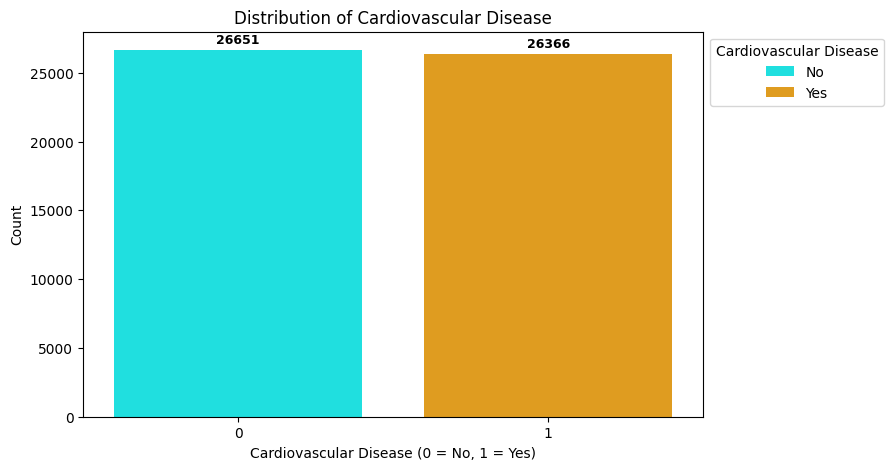

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

ax = sns.countplot(x='cardio', data=df, hue='cardio', palette={0: 'aqua', 1: 'orange'})

plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=9, color='black', fontweight='bold', 
                    xytext=(0, 5), textcoords='offset points')

plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [1]:
import pandas as pd

df = pd.read_csv('data/cleaned_data.csv')

high_bp = (df['systolic'] > 140) | (df['diastolic'] > 90)

abnormal_cholesterol = (df['cholesterol'] != 0)

abnormal_glucose = (df['gluc'] != 0)

smoking = (df['smoke'] == 1)
alcohol = (df['alco'] == 1)
inactive = (df['active'] == 0)

df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)

def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_category)

bmi_risk = (df['bmi'] >= 25)

risk_condition = (
    high_bp & abnormal_cholesterol & abnormal_glucose & smoking & alcohol & inactive & bmi_risk
)

risk_but_no_cardio = df[risk_condition & (df['cardio'] == 0) & (df['active'] == 0)]

risk_but_no_cardio = risk_but_no_cardio.drop(columns=['height_m', 'bmi_category'])

cols_without_cardio = [col for col in risk_but_no_cardio.columns if col != 'cardio']

numeric_cols = [col for col in cols_without_cardio if pd.api.types.is_numeric_dtype(risk_but_no_cardio[col])]
non_numeric_cols = [col for col in cols_without_cardio if not pd.api.types.is_numeric_dtype(risk_but_no_cardio[col])]

final_cols = numeric_cols + non_numeric_cols + ['cardio']

risk_but_no_cardio = risk_but_no_cardio[final_cols]

print("Jumlah data dengan kondisi tekanan darah, bmi, kolesterol, glukosa abnormal, merokok, mengonsumsi alkohol, serta tidak aktif berolahraga dengan label cardio = 0 :", len(risk_but_no_cardio), "pasien")
display(risk_but_no_cardio.head(10))


Jumlah data dengan kondisi tekanan darah, bmi, kolesterol, glukosa abnormal, merokok, mengonsumsi alkohol, serta tidak aktif berolahraga dengan label cardio = 0 : 1 pasien


,age,height,weight,systolic,diastolic,bmi,pulse_pressure,map,cholesterol,gluc,gender,smoke,alco,active,cardio
52031,45,173,92.0,140,100,30.739417,40,113.33,1,1,1,1,1,0,0


In [2]:
import pandas as pd

df = pd.read_csv('data/cleaned_data.csv')

df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)

def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_category)

normal_bp = (df['systolic'] <= 140) & (df['diastolic'] <= 90)
normal_cholesterol = (df['cholesterol'] == 0)
normal_glucose = (df['gluc'] == 0)
normal_bmi = (df['bmi'] >= 18.5) & (df['bmi'] < 25)
physically_active = (df['active'] == 1)
cardio_positive = (df['cardio'] == 1)

normal_condition = normal_bp & normal_cholesterol & normal_glucose & normal_bmi & physically_active & cardio_positive

normal_and_cardio = df[normal_condition]

normal_and_cardio = normal_and_cardio.drop(columns=['height_m', 'bmi_category'])

cols_without_cardio = [col for col in normal_and_cardio.columns if col != 'cardio']

numeric_cols = [col for col in cols_without_cardio if pd.api.types.is_numeric_dtype(normal_and_cardio[col])]
non_numeric_cols = [col for col in cols_without_cardio if not pd.api.types.is_numeric_dtype(normal_and_cardio[col])]

final_cols = numeric_cols + non_numeric_cols + ['cardio']

normal_and_cardio = normal_and_cardio[final_cols]

print("Jumlah data dengan kondisi tekanan darah, bmi, kolesterol, dan glukosa normal, serta aktif berolahraga dengan label cardio = 1 :", len(normal_and_cardio), "pasien")
display(normal_and_cardio.head(10))


Jumlah data dengan kondisi tekanan darah, bmi, kolesterol, dan glukosa normal, serta aktif berolahraga dengan label cardio = 1 : 4379 pasien


,age,height,weight,systolic,diastolic,bmi,pulse_pressure,map,cholesterol,gluc,gender,smoke,alco,active,cardio
37,50,178,68.0,110,80,21.461937,30,90.00,0,0,0,0,0,1,1
38,58,171,69.0,140,90,23.597004,50,106.67,0,0,1,0,0,1,1
40,47,162,64.0,140,90,24.386526,50,106.67,0,0,0,0,0,1,1
54,56,169,71.0,120,80,24.859074,40,93.33,0,0,1,0,0,1,1
60,64,155,57.0,120,80,23.725286,40,93.33,0,0,0,0,0,1,1
106,49,170,70.0,140,90,24.221453,50,106.67,0,0,0,0,0,1,1
108,59,165,65.0,140,90,23.875115,50,106.67,0,0,0,0,0,1,1
112,60,176,74.0,120,80,23.889463,40,93.33,0,0,0,0,0,1,1
125,60,165,55.0,140,80,20.202020,60,100.00,0,0,0,0,0,1,1
127,59,169,58.0,110,80,20.307412,30,90.00,0,0,1,0,0,1,1
